# CLASSIFIERS

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
import pickle
import copy
import warnings
warnings.filterwarnings('ignore')

In [60]:
#Setting the seed to main consistency across models for comparison
np.random.seed(5)

# KNN Classification on Final Dataset

In [61]:
#Reading the data
data=np.loadtxt('tictac_final.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target"])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

In [62]:
#Performing train, test, val split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.75,shuffle=True)

Text(0, 0.5, 'Validation error')

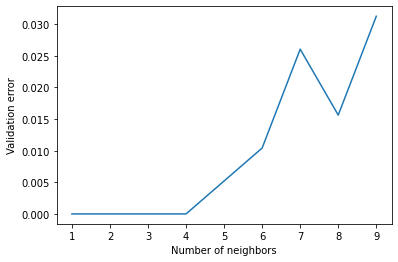

In [63]:
#Hyperparameter tuning (Finding suitable number of neighbors)
n_neighbors=[]
validation_error=[]
for i in range(1,10):
    n_neighbors.append(i)
    k_neighbors_model=KNeighborsClassifier(n_neighbors=i)
    k_neighbors_model.fit(X_train,y_train)
    validation_error.append(1-np.mean(k_neighbors_model.predict(X_val)==y_val))
plt.plot(n_neighbors,validation_error)
plt.xlabel("Number of neighbors")
plt.ylabel("Validation error")

Accuracy of KNN Classifier on Final dataset is 1.0
******
Confusion matrix


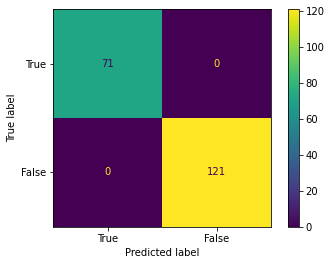

******
Normalized confusion matrix
[[1 0]
 [0 1]]


In [64]:
#Finding accuracy of KNN Classifier (number of neighbors=1)
final_model=KNeighborsClassifier(n_neighbors=1)
final_model.fit(X_test,y_test)
test_error=1-np.mean(final_model.predict(X_test)==y_test)
y_pred=final_model.predict(X_test)
print("Accuracy of KNN Classifier on Final dataset is {}".format(1-test_error))
print("******")
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = [True, False])
cm_display.plot()
plt.show()
print("******")
print("Normalized confusion matrix")
cm=confusion_matrix(y_test,y_pred)
n=len(cm)
for row in range(n):
    s=sum(cm[row])
    for column in range(n):
        cm[row][column]=cm[row][column]/s
print(cm)

In [65]:
#Performing KFold Cross Validation on Final dataset
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf=KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(clf.predict(X_test)==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 1.0


# Single Label Intermediate boards optimal play (KNN Classifier)

In [66]:
#Reading the data
data=np.loadtxt('tictac_single.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target"])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

In [67]:
#Performing train, test, val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.75,shuffle=True)

Text(0, 0.5, 'Validation error')

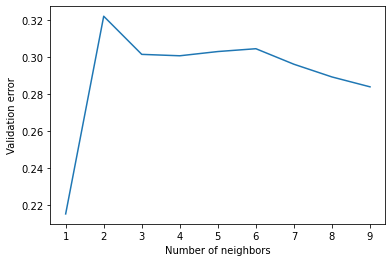

In [68]:
#Hyperparameter tuning (Finding suitable number of neighbors)
n_neighbors=[]
validation_error=[]
for i in range(1,10):
    n_neighbors.append(i)
    k_neighbors_model=KNeighborsClassifier(n_neighbors=i)
    k_neighbors_model.fit(X_train,y_train)
    validation_error.append(1-np.mean(k_neighbors_model.predict(X_val)==y_val))
plt.plot(n_neighbors,validation_error)
plt.xlabel("Number of neighbors")
plt.ylabel("Validation error")

Accuracy of KNN Classifier on Final dataset is 1.0
******
Confusion matrix


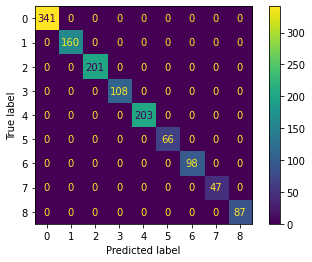

******
Normalized confusion matrix
[[1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1]]


In [69]:
#Finding accuracy of KNN Classifier (number of neighbors=1)
final_model=KNeighborsClassifier(n_neighbors=1)
final_model.fit(X_test,y_test)
test_error=1-np.mean(final_model.predict(X_test)==y_test)
y_pred=final_model.predict(X_test)
print("Accuracy of KNN Classifier on Final dataset is {}".format(1-test_error))
print("******")
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()
print("******")
print("Normalized confusion matrix")
cm=confusion_matrix(y_test,y_pred)
n=len(cm)
for row in range(n):
    s=sum(cm[row])
    for column in range(n):
        cm[row][column]=cm[row][column]/s
print(cm)

In [70]:
#Performing KFold Cross Validation on Final dataset
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=15,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf=KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(clf.predict(X_test)==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.9267734553775744


# SVM on Final Dataset

In [71]:
np.random.seed(5)

In [72]:
#Reading the data
data=np.loadtxt('tictac_final.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target"])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

In [73]:
#Performing train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)

In [74]:
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy of SVM on Final dataset is 0.9791666666666666
******
Confusion matrix


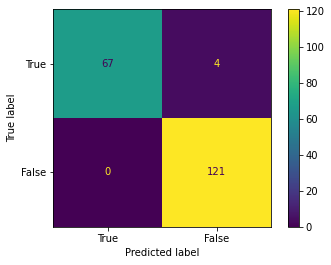

******
Normalized confusion matrix
[[0 0]
 [0 1]]


In [75]:
clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(X_train, y_train)
test_error=1-np.mean(clf.predict(X_test)==y_test)
y_pred=clf.predict(X_test)
print("Accuracy of SVM on Final dataset is {}".format(1-test_error))
print("******")
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred), display_labels = [True, False])
cm_display.plot()
plt.show()
print("******")
print("Normalized confusion matrix")
cm=confusion_matrix(y_test,y_pred)
n=len(cm)
for row in range(n):
    s=sum(cm[row])
    for column in range(n):
        cm[row][column]=cm[row][column]/s
print(cm)

In [76]:
#k- fold cross validation
#Performing KFold Cross Validation on Final dataset
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf = svm.SVC(kernel = 'linear', C = 1.0)
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(clf.predict(X_test)==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.9947916666666666


# Single Label Intermediate boards optimal play (SVM Classifier)

In [77]:
#Reading the data
data=np.loadtxt('tictac_single.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target"])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

In [78]:
#Performing train, test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)

Accuracy of SVM Classifier on dataset is 0.4035087719298245
******
Confusion matrix


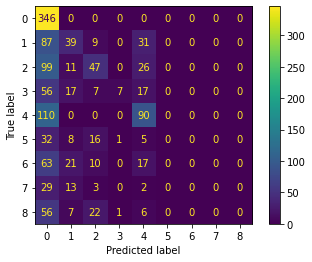

******
Normalized confusion matrix
[[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


In [79]:
#Finding accuracy of SVM Classifier
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_test,y_test)
test_error=1-np.mean(clf.predict(X_test)==y_test)
y_pred=clf.predict(X_test)
print("Accuracy of SVM Classifier on dataset is {}".format(1-test_error))
print("******")
print("Confusion matrix")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()
print("******")
print("Normalized confusion matrix")
cm=confusion_matrix(y_test,y_pred)
n=len(cm)
for row in range(n):
    s=sum(cm[row])
    for column in range(n):
        cm[row][column]=cm[row][column]/s
print(cm)

In [80]:
#Performing KFold Cross Validation on single dataset
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=15,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf = svm.SVC(kernel='linear', C = 1.0)
    clf.fit(X_test,y_test)
    test_accuracies.append(np.mean(clf.predict(X_test)==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.5469107551487414


In [81]:
#Setting the seed to main consistency across models for comparison
np.random.seed(5)

# MLP Classifier on Final Dataset

In [82]:
#Reading the data
data=np.loadtxt('tictac_final.txt')

#Creating a dataframe to understand the data
#Separating features and target from the dataframe
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

In [83]:
#Performing train, test, val split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.85,shuffle=True)

Classification Accuracy : 0.5469107551487414
Confusion Matrix: 


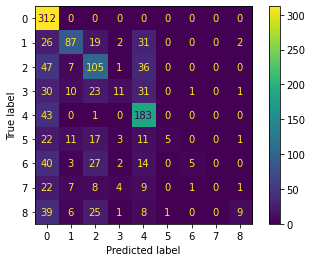

Normalized confusion matrix: [[1.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.08333333 0.52095808 0.09693878 0.01869159 0.13656388 0.
  0.         0.         0.02247191]
 [0.15064103 0.04191617 0.53571429 0.00934579 0.15859031 0.
  0.         0.         0.        ]
 [0.09615385 0.05988024 0.11734694 0.10280374 0.13656388 0.
  0.01098901 0.         0.01123596]
 [0.13782051 0.         0.00510204 0.         0.8061674  0.
  0.         0.         0.        ]
 [0.07051282 0.06586826 0.08673469 0.02803738 0.04845815 0.07142857
  0.         0.         0.01123596]
 [0.12820513 0.01796407 0.1377551  0.01869159 0.06167401 0.
  0.05494505 0.         0.        ]
 [0.07051282 0.04191617 0.04081633 0.03738318 0.03964758 0.
  0.01098901 0.         0.01123596]
 [0.125      0.03592814 0.12755102 0.00934579 0.03524229 0.01428571
  0.         0.         0.1011236 ]]


In [84]:
skf = StratifiedKFold(n_splits=10, random_state = 40, shuffle=True)
#         print(skf.get_n_splits(X, y))
clf = MLPClassifier(solver='adam', alpha=1e-3, max_iter=5, hidden_layer_sizes=(256,256,128,), random_state=20, activation = 'tanh')
for train_indices, test_indices in skf.split(X_train, y_train):
    clf.fit(X[train_indices], np.ravel(y[train_indices], order = 'C'))
    #print(clf.score(X[test_indices], y[test_indices]))
y_pred = clf.predict(X_test)
print("Classification Accuracy : " + str(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: ")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()
C = confusion_matrix(y_test, y_pred)
C = C.astype(np.float)/C.astype(np.float).sum(axis=1)
print("Normalized confusion matrix:" , C)

In [85]:
#Performing KFold Cross Validation 
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf=MLPClassifier()
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(clf.predict(X_test)==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.8764302059496567


# Single Label Intermediate boards optimal play (MLP Classifier)

In [86]:
#Reading the data
data=np.loadtxt('tictac_single.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target"])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

In [87]:
#Performing train, test, val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.85,shuffle=True)

Classification Accuracy : 0.5293668954996186
Confusion Matrix: 


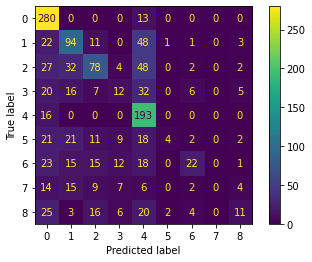

Normalized confusion matrix: [[0.9556314  0.         0.         0.         0.06220096 0.
  0.         0.         0.        ]
 [0.07508532 0.52222222 0.05699482 0.         0.22966507 0.01136364
  0.00943396 0.         0.03448276]
 [0.09215017 0.17777778 0.40414508 0.04081633 0.22966507 0.
  0.01886792 0.         0.02298851]
 [0.06825939 0.08888889 0.03626943 0.12244898 0.15311005 0.
  0.05660377 0.         0.05747126]
 [0.05460751 0.         0.         0.         0.92344498 0.
  0.         0.         0.        ]
 [0.07167235 0.11666667 0.05699482 0.09183673 0.0861244  0.04545455
  0.01886792 0.         0.02298851]
 [0.07849829 0.08333333 0.07772021 0.12244898 0.0861244  0.
  0.20754717 0.         0.01149425]
 [0.04778157 0.08333333 0.04663212 0.07142857 0.02870813 0.
  0.01886792 0.         0.04597701]
 [0.08532423 0.01666667 0.08290155 0.06122449 0.09569378 0.02272727
  0.03773585 0.         0.12643678]]


In [88]:
skf = StratifiedKFold(n_splits=10, random_state = 40, shuffle=True)
#         print(skf.get_n_splits(X, y))
clf = MLPClassifier(solver='adam', alpha=1e-3, max_iter=5, hidden_layer_sizes=(256,256,128,), random_state=20, activation = 'tanh')
for train_indices, test_indices in skf.split(X_train, y_train):
    clf.fit(X[train_indices], np.ravel(y[train_indices], order = 'C'))
    #print(clf.score(X[test_indices], y[test_indices]))
y_pred = clf.predict(X_test)
print("Classification Accuracy : " + str(accuracy_score(y_test, y_pred)))
print("Confusion Matrix: ")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()
C = confusion_matrix(y_test, y_pred)
C = C.astype(np.float)/C.astype(np.float).sum(axis=1)
print("Normalized confusion matrix:",C)

In [89]:
#Performing KFold Cross Validation 
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=15,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf=MLPClassifier()
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(clf.predict(X_test)==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.8924485125858124


#Regressors

# Multi output Regression-Intermediate boards optimal play (KNN Regressor)

In [90]:
#Reading the data
data=np.loadtxt('tictac_multi.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target_column {}".format(i) for i in range(1,10)])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:9])
y=np.array(df.iloc[:,9:])

In [91]:
#Performing train, test, val split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.75,shuffle=True)

Text(0, 0.5, 'Validation error')

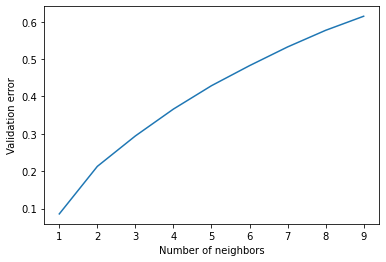

In [92]:
#Hyperparameter tuning (Finding suitable number of neighbors)
n_neighbors=[]
validation_error=[]
for i in range(1,10):
    n_neighbors.append(i)
    k_neighbors_model=KNeighborsRegressor(n_neighbors=i)
    k_neighbors_model.fit(X_train,y_train)
    validation_error.append(1-np.mean(k_neighbors_model.predict(X_val)==y_val))
plt.plot(n_neighbors,validation_error)
plt.xlabel("Number of neighbors")
plt.ylabel("Validation error")

In [93]:
#Finding accuracy of KNN Regressor (number of neighbors=1)
final_model=KNeighborsRegressor(n_neighbors=1)
final_model.fit(X_test,y_test)
y_pred=final_model.predict(X_test)
test_error=1-np.mean(np.round(final_model.predict(X_test))==y_test)
y_pred=final_model.predict(X_test)
print("Accuracy of KNN Regressor on Multi dataset is {}".format(1-test_error))

Accuracy of KNN Regressor on Multi dataset is 1.0


In [94]:
#Performing KFold Cross Validation on Final dataset
from sklearn.model_selection import KFold
skf=KFold(n_splits=10,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf=KNeighborsRegressor(n_neighbors=1)
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(np.round(clf.predict(X_test))==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.9636980491942324


# Linear Regression using Normal Equations

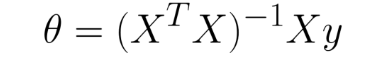

In [95]:
data_multi = np.loadtxt('tictac_multi.txt')
df = pd.DataFrame(data = data_multi)

In [96]:
print(df)

       0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     1.0 -1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     1.0  0.0  1.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  1.0  0.0  1.0  1.0   
2     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
3     0.0  1.0  1.0  0.0  0.0  0.0  0.0 -1.0  0.0  1.0  0.0  0.0  0.0  0.0   
4     1.0  1.0 -1.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
6546 -1.0  0.0  1.0  1.0  1.0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6547  1.0  0.0  1.0 -1.0  1.0  1.0 -1.0  0.0 -1.0  0.0  0.0  0.0  0.0  0.0   
6548 -1.0 -1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
6549  0.0  1.0  1.0 -1.0 -1.0  1.0  0.0  1.0 -1.0  1.0  0.0  0.0  0.0  0.0   
6550  1.0  1.0 -1.0  1.0  0.0  1.0 -1.0 -1.0  0.0  0.0  0.0  0.0  0.0  1.0   

       14   15   16   17  
0     0.0  1.0  0.0  1.0  
1     1.0

In [97]:
X = np.array(df.iloc[:,:-9])
Y = np.array(df.iloc[:,9:])

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,shuffle=True)

In [99]:
#adding a bias vector to X
x_bias = np.ones((5240,1))
x1 = np.append(x_bias, X_train, axis = 1)
print(x1)

[[ 1.  0. -1. ...  1. -1. -1.]
 [ 1. -1.  1. ...  1.  1. -1.]
 [ 1.  1. -1. ... -1.  1.  0.]
 ...
 [ 1.  0. -1. ...  1.  0.  1.]
 [ 1.  0.  1. ...  1. -1.  0.]
 [ 1.  1. -1. ...  0.  1. -1.]]


In [100]:
#taking transpose of X_new
x1_transpose = np.transpose(x1)
x1_transpose

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0., -1.,  1., ...,  0.,  0.,  1.],
       [-1.,  1., -1., ..., -1.,  1., -1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1.,  0.],
       [-1.,  1.,  1., ...,  0., -1.,  1.],
       [-1., -1.,  0., ...,  1.,  0., -1.]])

In [101]:
#multiplying X transpose and X_new
transpose_x_new = x1_transpose.dot(x1)
transpose_x_new

array([[5240.,  237.,  501.,  276.,  444.,  250.,  463.,  390.,  423.,
         333.],
       [ 237., 3115., -527., -382., -500., -334.,  -99., -385., -125.,
        -445.],
       [ 501., -527., 3227., -523., -263., -375., -250., -144., -605.,
        -101.],
       [ 276., -382., -523., 3158., -123., -325., -531., -442., -101.,
        -397.],
       [ 444., -500., -263., -123., 3200., -390., -630., -505., -225.,
        -122.],
       [ 250., -334., -375., -325., -390., 3076., -398., -311., -399.,
        -326.],
       [ 463.,  -99., -250., -531., -630., -398., 3239., -109., -258.,
        -496.],
       [ 390., -385., -144., -442., -505., -311., -109., 3118., -517.,
        -367.],
       [ 423., -125., -605., -101., -225., -399., -258., -517., 3201.,
        -535.],
       [ 333., -445., -101., -397., -122., -326., -496., -367., -535.,
        3113.]])

In [102]:
print(y_train)
print(y_train.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(5240, 9)


In [103]:
#Taking inverse of X transpose * X_new
temp_1 = np.linalg.inv(transpose_x_new)
temp_1

array([[ 0.00052129, -0.00050942, -0.00052888, -0.00051288, -0.00052158,
        -0.00052613, -0.00052027, -0.00052824, -0.00052158, -0.0005215 ],
       [-0.00050942,  0.00107025,  0.00080003,  0.00078256,  0.00078992,
         0.00079957,  0.00075659,  0.00079776,  0.00076267,  0.0007936 ],
       [-0.00052888,  0.00080003,  0.00108181,  0.00080114,  0.00078114,
         0.00081307,  0.00077697,  0.00078888,  0.00080746,  0.00077953],
       [-0.00051288,  0.00078256,  0.00080114,  0.00107035,  0.00076405,
         0.00080076,  0.00079094,  0.0008008 ,  0.00076293,  0.00079457],
       [-0.00052158,  0.00078992,  0.00078114,  0.00076405,  0.0010683 ,
         0.00080633,  0.00079801,  0.00080728,  0.00077095,  0.00077262],
       [-0.00052613,  0.00079957,  0.00081307,  0.00080076,  0.00080633,
         0.00111773,  0.00080376,  0.00081511,  0.00080762,  0.00081069],
       [-0.00052027,  0.00075659,  0.00077697,  0.00079094,  0.00079801,
         0.00080376,  0.00105944,  0.00077457

In [104]:
#calculating intercept and slope for all 9 Y output vectors 
intercept_list = []
slope_list = []
for y in range(9):
  temp_2 = x1_transpose.dot(y_train[:,y]) 
  theta = temp_1.dot(temp_2)
  print("theta:",theta)
  intercept = theta[0]
  intercept_list.append(intercept)
  slope = theta[1:]
  slope_list.append(slope)
  print("slope:",slope)
  print("slope_list:",slope_list)

theta: [ 0.25446227 -0.03357776 -0.01703676 -0.02111547 -0.01528032 -0.0167998
 -0.02912966 -0.02347553 -0.03000529  0.00377797]
slope: [-0.03357776 -0.01703676 -0.02111547 -0.01528032 -0.0167998  -0.02912966
 -0.02347553 -0.03000529  0.00377797]
slope_list: [array([-0.03357776, -0.01703676, -0.02111547, -0.01528032, -0.0167998 ,
       -0.02912966, -0.02347553, -0.03000529,  0.00377797])]
theta: [ 0.16353765  0.02665612 -0.0068435   0.01310936  0.02574419  0.03560866
  0.02474687  0.03043003  0.00783156  0.03478912]
slope: [ 0.02665612 -0.0068435   0.01310936  0.02574419  0.03560866  0.02474687
  0.03043003  0.00783156  0.03478912]
slope_list: [array([-0.03357776, -0.01703676, -0.02111547, -0.01528032, -0.0167998 ,
       -0.02912966, -0.02347553, -0.03000529,  0.00377797]), array([ 0.02665612, -0.0068435 ,  0.01310936,  0.02574419,  0.03560866,
        0.02474687,  0.03043003,  0.00783156,  0.03478912])]
theta: [ 0.24376511 -0.00714976 -0.01291663 -0.02883278 -0.02643159  0.00350607


In [105]:
#calculating predicted value
def predict_value(X):
    predicted_value_list = []
    for i in range(9):
      predicted_value = 0
      for j in range(9):
        predicted_value = predicted_value + slope_list[i][j]*X[j] + intercept_list[i]
        #print(predicted_value)
        if predicted_value >= 0.25:
          predicted_value = 1
        else:
          predicted_value = 0
      predicted_value_list.append(predicted_value)
    return predicted_value_list

In [106]:
predict_list = []
len(X_test)
for i in range(1311):
  prediction = predict_value(X_test[i,:], )
  predict_list.append(prediction)

In [107]:
print(predict_list)

[[1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 0], [1, 0, 1, 0, 

In [108]:
true_positives = 0
true_negatives = 0
false_positives = 0
false_negatives = 0
for i in range (9):
  for j in range(9):
    if(y_test[i][j] == 1 and predict_list[i][j] == 1):
      true_positives += 1
    elif (y_test[i][j] == 0 and predict_list[i][j] == 0):
      true_negatives +=1
    elif (y_test[i][j] == 1 and predict_list[i][j] == 0):
      false_positives +=1
    else:
      false_negatives += 1

accuracy = (true_positives + true_negatives)/(true_positives + true_negatives + false_positives + false_negatives)
print("accuracy: ", accuracy)

accuracy:  0.5061728395061729


# Linear Regression - K-Fold cross validation

In [109]:
#Reading the data
data=np.loadtxt('tictac_multi.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target_column {}".format(i) for i in range(1,10)])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:9])
y=np.array(df.iloc[:,9:])

In [110]:
#Performing train, test, val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.75,shuffle=True)

In [111]:
# Accuracy of Linear Regressor

reg = LinearRegression().fit(X_test, y_test)
y_pred=reg.predict(X_test)
test_error=1-np.mean(np.round(reg.predict(X_test))==y_test)
y_pred=reg.predict(X_test)
print("Accuracy of Linear Regression on tictac_multi:".format(1-test_error))

Accuracy of Linear Regression on tictac_multi:


In [112]:
#Performing KFold Cross Validation on dataset
from sklearn.model_selection import KFold
skf=KFold(n_splits=10,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in skf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model = LinearRegression().fit(X_train,y_train)
    test_accuracies.append(np.mean(np.round(model.predict(X_test))==y_test))
print("Accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Accuracy acheived with K-Fold Cross validation is 0.7903307888040713


# Multi Label Intermediate boards optimal play (MLP Regressor)

In [113]:
#Reading the data
data=np.loadtxt('tictac_multi.txt')

#Creating a dataframe to understand the data
df=pd.DataFrame(data=data,columns=["input_column {}".format(i) for i in range(1,10)]+["target_column {}".format(i) for i in range(1,10)])

#Separating features and target from the dataframe
X=np.array(df.iloc[:,:9])
y=np.array(df.iloc[:,9:])

In [114]:
#Performing train, test, val split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.75,shuffle=True)

In [115]:
regr = MLPRegressor(solver='adam', alpha=1e-6, max_iter=300, hidden_layer_sizes=(256,256,128,9), random_state=777, activation = 'relu')
regr.fit(X_train, y_train)
print("Regressor score (R^2) : ")
print(regr.score(X_test, y_test))

Regressor score (R^2) : 
0.6785245854911729


In [116]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=37,shuffle=True)
test_accuracies=[]
for train_index,test_index in kf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    clf=MLPRegressor()
    clf.fit(X_train,y_train)
    test_accuracies.append(np.mean(np.round(clf.predict(X_test))==y_test))
#print(len(test_accuracies))
print("Maximum test accuracy acheived with K-Fold Cross validation is {}".format(max(test_accuracies)))

Maximum test accuracy acheived with K-Fold Cross validation is 0.9229855810008482
